<a href="https://colab.research.google.com/github/tewei0328/pbl-book/blob/master/DNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from tensorflow import keras
from tensorflow.keras import datasets,layers,optimizers,Sequential,metrics

TensorFlow 2.x selected.


In [ ]:
(x,y),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [ ]:
print(x.shape,y.shape) 

(60000, 28, 28) (60000,)


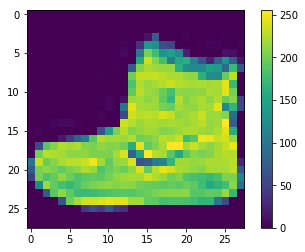

In [ ]:
plt.figure()
plt.imshow(x[0])
plt.colorbar()
plt.grid(False)

In [ ]:
def feature_scale(x,y):
  x = tf.cast(x,dtype=tf.float32)/255.
  y = tf.cast(y,dtype=tf.int32)
  return x,y

In [ ]:
data = tf.data.Dataset.from_tensor_slices((x,y))
data = data.map(feature_scale).shuffle(10000).batch(128)

data_test = tf.data.Dataset.from_tensor_slices((x_test,y_test))
data_test = data_test.map(feature_scale).shuffle(10000).batch(128)

In [ ]:
data_iter = iter(data)

In [ ]:
samples = next(data_iter)
print(samples[0].shape,samples[1].shape)

(128, 28, 28) (128,)


In [ ]:
model = Sequential([
    layers.Dense(256,activation=tf.nn.relu),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(10,activation=tf.nn.relu)
])

In [ ]:
model.build(input_shape=[None,28*28])

In [ ]:
model.summary()
optimizer = optimizers.Adam(lr=1e-3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  8256      
_________________________________________________________________
dense_3 (Dense)              multiple                  2080      
_________________________________________________________________
dense_4 (Dense)              multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
for i in range(10):
  for step,(x,y) in enumerate(data):
    x = tf.reshape(x,[-1,28*28])
    with tf.GradientTape() as tape:
      logits = model(x)
      y_one_hot = tf.one_hot(y,depth=10)
      loss = tf.losses.categorical_crossentropy(y_one_hot,logits,from_logits=True)
      loss = tf.reduce_mean(loss)
    grads = tape.gradient(loss,model.trainable_variables)
    optimizer.apply_gradients(zip(grads,model.trainable_variables))
    
    if step %100==0:
      print(i,step,'loss:',float(loss))

0 0 loss: 2.294835090637207
0 100 loss: 0.9589865207672119
0 200 loss: 0.9012205600738525
0 300 loss: 0.7716777324676514
0 400 loss: 0.5933138132095337
1 0 loss: 0.7071888446807861
1 100 loss: 0.6537793874740601
1 200 loss: 0.6194038391113281
1 300 loss: 0.35296180844306946
1 400 loss: 0.2986428737640381
2 0 loss: 0.41851896047592163
2 100 loss: 0.4710457921028137
2 200 loss: 0.20759794116020203
2 300 loss: 0.3794896602630615
2 400 loss: 0.2676364779472351
3 0 loss: 0.24848876893520355
3 100 loss: 0.4161760210990906
3 200 loss: 0.2614879310131073
3 300 loss: 0.33055412769317627
3 400 loss: 0.29682204127311707
4 0 loss: 0.29159894585609436
4 100 loss: 0.31069400906562805
4 200 loss: 0.25948452949523926
4 300 loss: 0.3187548816204071
4 400 loss: 0.22262153029441833
5 0 loss: 0.250057578086853
5 100 loss: 0.3853711485862732
5 200 loss: 0.27191829681396484
5 300 loss: 0.2196950912475586
5 400 loss: 0.23855064809322357
6 0 loss: 0.26672160625457764
6 100 loss: 0.3384547829627991
6 200 loss:

In [ ]:
total_loss = 0
total_num=0
for x,y in data_test:
  
  x = tf.reshape(x,[-1,28*28])
  
  gd = model(x)
  prob = tf.nn.softmax(gd,axis=1)
  pred = tf.argmax(prob,axis=1)
  
  pred = tf.cast(pred,dtype=tf.int32)
  correct = tf.equal(pred,y)
  
  result = tf.reduce_sum(tf.cast(correct,dtype=tf.int32))
  
  total_loss += int(result)
  total_num += x.shape[0]
  
acc = total_loss/total_num

In [ ]:
acc

0.8801